In [20]:
IMAGE_SIZE=48

In [21]:
import pandas as pd
import tqdm 
import numpy as np
import random
random.seed(26)
import os

In [23]:
#Read the csv as dataframe to understand what's in there.
df = pd.read_csv("fer2013.csv")
print(df.head(10))


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
5        2  55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...  Training
6        4  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...  Training
7        3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...  Training
8        3  85 84 90 121 101 102 133 153 153 169 177 189 1...  Training
9        2  255 254 255 254 254 179 122 107 95 124 149 150...  Training


In [24]:
#total number of examples
print(len(df))
#find uniques in Usage column and how many
df.Usage.value_counts()

35887


Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [25]:
#number of unique classes
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [26]:
#expressions = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
expressions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [27]:
#shuffle the data

def read_data_2(filename,entry_type):
    alldata=[]
    X=[]
    y=[]
    with open(filename , 'r') as f:
        alldata=f.readlines()
        random.shuffle(alldata)
        for line in alldata:
            if str(entry_type) in line:
                row = line.split(',')
                y.append(int(row[0]))
                X.append([int(p) for p in row[1].split()] )            
    return np.array(X),np.array(y)
          

def load_data_2(entry_type):
    X_file  = entry_type+"_X.npy"
    y_file = entry_type+"_y.npy"
    
    if os.path.exists(X_file) and os.path.exists(y_file):
        print("Found numpy arrays saved a files..loading ")
        X,y = np.load(X_file), np.load(y_file)
    else:
        print("Numpy array file missing..")
        X, y = read_data_2(DATA_PATH+ "/fer2013.csv", str(entry_type))
        #save np array to file for faster processing for 2nd run

        np.save(X_file, X)
        np.save(y_file,y)
        
        #normalize the X before returning it
    X = X.astype(np.float32) / 255.0
    y = y.astype(np.int32)   
    return X , y



In [28]:
#Deprecated data read functions
'''
def read_data(filename, entry_type):
    X=[]
    y=[]
    with open(filename , 'r') as f:
        f.readline() #skip first line
        for line in f:
                if str(entry_type) in line:
                
                    row = line.split(',')
                    y.append(int(row[0]))
                    X.append([int(p) for p in row[1].split()] )
          
    return np.array(X),np.array(y)



def load_data(entry_type):
    X_file  = entry_type+"_X.npy"
    y_file = entry_type+"_y.npy"
    
    if os.path.exists(X_file) and os.path.exists(y_file):
        print("Found numpy arrays saved a files..loading ")
        X,y = np.load(X_file), np.load(y_file)
    else:
        print("Numpy array file missing..")
        X, y = read_data(DATA_PATH+ "/fer2013.csv", str(entry_type))
        #save np array to file for faster processing for 2nd run

        np.save(X_file, X)
        np.save(y_file,y)
        
        #normalize the X before returning it
    X = X.astype(np.float32) / 255.0
    y = y.astype(np.int32)   
    return X , y
'''
'''
X_train,y_train = load_data("Training")

X_val,y_val = load_data("PrivateTest")

X_test,y_test = load_data("PublicTest")
'''

'\nX_train,y_train = load_data("Training")\n\nX_val,y_val = load_data("PrivateTest")\n\nX_test,y_test = load_data("PublicTest")\n'

In [29]:


X_train,y_train = load_data_2("Training")

X_val,y_val = load_data_2("PrivateTest")

X_test,y_test = load_data_2("PublicTest")


#reshape to 48x48 and add a dimension
X_train = X_train.reshape(X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)
X_val = X_val.reshape(X_val.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)
X_test = X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)


Found numpy arrays saved a files..loading 
Found numpy arrays saved a files..loading 
Found numpy arrays saved a files..loading 


In [30]:
SAMPLE_SIZE=0
if SAMPLE_SIZE != 0:
    X_train = X_train[:SAMPLE_SIZE]
    X_val = X_val[:SAMPLE_SIZE//3]
    y_train = y_train[:SAMPLE_SIZE]
    y_val = y_val[:SAMPLE_SIZE//3]

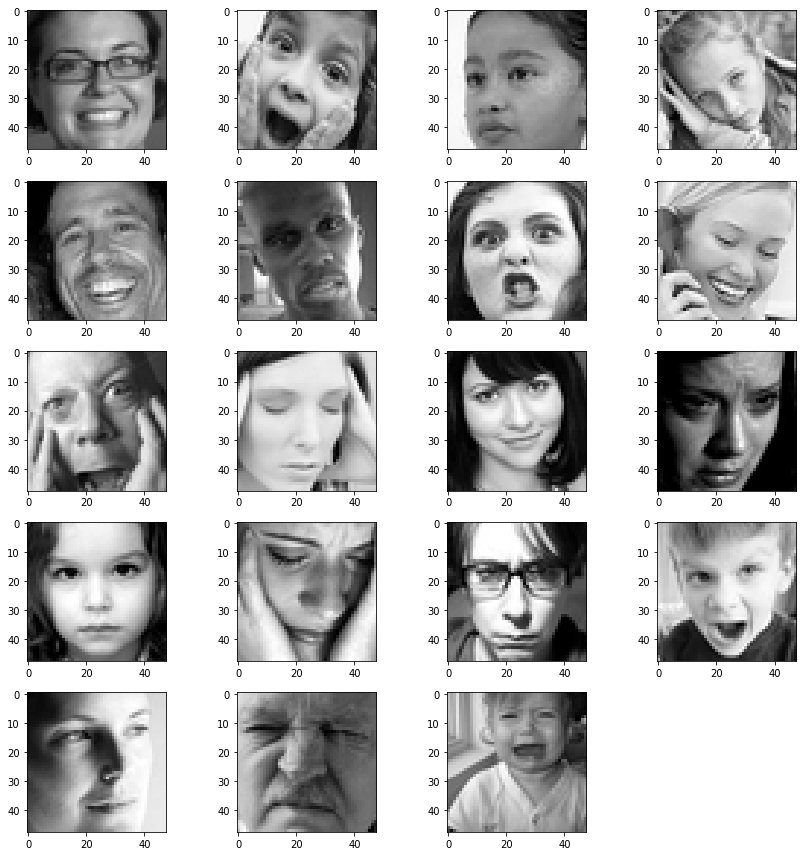

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
plt.figure(0, figsize=(12,12))
for i in range(1, 20):
    plt.subplot(5,4,i)
    plt.imshow(X_train[i, :, :, 0], cmap="gray")

plt.tight_layout()
plt.show()

In [32]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Reshape
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D

from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,  BatchNormalization,  Activation,ZeroPadding2D
from keras import optimizers, callbacks, layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json


In [33]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

num_classes = y_train.shape[1]


In [34]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(16, (3, 3),  padding='same',activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
#model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#model.load_weights('my_model_bestwts_mod.h5')
sgd = optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
adam=optimizers.Adam(lr=0.021)

In [35]:
#calls=callbacks.ModelCheckpoint(filepath="my_model_bestwts_mod.h5",monitor='val_acc',
 #                                     save_best_only=False, save_weights_only=False, mode='auto', period=1)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [36]:

#model.fit(train_X, train_y, batch_size=64, epochs=15, verbose=1, validation_data=(test_X, test_y),callbacks=[calls])
#model.save_weights('my_model_weights_mod.h5')
datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=40,
        # randomly shift images horizontally
        width_shift_range=0.2,
        # randomly shift images vertically
        height_shift_range=0.25,
        # randomly flip images
        horizontal_flip=False,
        # randomly flip images
        vertical_flip=False)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       18560     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 12, 12, 128)       0         
__________

In [37]:
batch_size = 1024
maxepoches = 60
learning_rate = 0.2
lr_decay = 1e-6
lr_drop = 20

def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = callbacks.LearningRateScheduler(lr_scheduler)



In [38]:
#using image augmentation
historytemp = model.fit_generator(datagen.flow(X_train, y_train,
                             batch_size=batch_size),
                steps_per_epoch=X_train.shape[0] //batch_size,
                epochs=maxepoches,
                validation_data=(X_val, y_val),
                                  callbacks=[reduce_lr],
                                  verbose=1)
'''
model.fit(X_train, y_train, batch_size=100, epochs=60, verbose=1, validation_data=(X_val, y_val))
         # ,callbacks=[calls])
    '''

Epoch 1/60
 9/28 [========>.....................] - ETA: 2:29 - loss: 10.8961 - acc: 0.2449

KeyboardInterrupt: 

In [46]:
#no image agumentation
model.fit(X_train, y_train, batch_size=100, epochs=60, verbose=1, validation_data=(X_val, y_val))
         # ,callbacks=[calls])

Train on 28709 samples, validate on 3589 samples
Epoch 1/60
28709/28709 [==============================] - 255s 9ms/step - loss: 12.0338 - acc: 0.2509 - val_loss: 12.1705 - val_acc: 0.2449
Epoch 2/60
 7600/28709 [======>.......................] - ETA: 2:59 - loss: 12.1607 - acc: 0.2455

KeyboardInterrupt: 

In [42]:
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
#2nd convolution layer
model.add(Conv2D(16, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
 
model.add(Dense(num_classes, activation='softmax'))

In [43]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 44, 44, 16)        416       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 18, 18, 16)        2320      
_________________________________________________________________
average_pooling2d_3 (Average (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 32)          4640      
_________________________________________________________________
average_pooling2d_4 (Average (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
__________

In [44]:
gen = ImageDataGenerator()
train_generator = gen.flow(X_train, y_train, batch_size=batch_size)
 

 

In [45]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit_generator(train_generator, 
                    #steps_per_epoch=batch_size,
                                    steps_per_epoch=X_train.shape[0] //batch_size,

                    epochs=maxepoches)

Epoch 1/60
21/28 [=====================>........] - ETA: 11s - loss: 12.7378 - acc: 0.1699

KeyboardInterrupt: 

In [47]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

KeyboardInterrupt: 

In [49]:
X_train,y_train = load_data_2("Training")

X_val,y_val = load_data_2("PrivateTest")

X_test,y_test = load_data_2("PublicTest")


#reshape to 48x48 and add a dimension
X_train = X_train.reshape(X_train.shape[0],1,IMAGE_SIZE,IMAGE_SIZE)
X_val = X_val.reshape(X_val.shape[0],1,IMAGE_SIZE,IMAGE_SIZE)
X_test = X_test.reshape(X_test.shape[0],1,IMAGE_SIZE,IMAGE_SIZE)


Found numpy arrays saved a files..loading 
Found numpy arrays saved a files..loading 
Found numpy arrays saved a files..loading 


In [50]:
img_rows, img_cols = 48, 48
model = Sequential()
model.add(Convolution2D(64, 5, 5, border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(keras.layers.convolutional.ZeroPadding2D(padding=(2, 2), dim_ordering='th'))
model.add(MaxPooling2D(pool_size=(5, 5),strides=(2, 2)))

model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th')) 
model.add(Convolution2D(64, 3, 3))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th')) 
model.add(Convolution2D(64, 3, 3))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(keras.layers.convolutional.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))

model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th'))
model.add(Convolution2D(128, 3, 3))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th'))
model.add(Convolution2D(128, 3, 3))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))

model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='th'))
model.add(keras.layers.convolutional.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
model.add(Dropout(0.2))


model.add(Dense(7))


model.add(Activation('softmax'))

ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
model.compile(loss='categorical_crossentropy',
              optimizer=ada,
              metrics=['accuracy'])
model.summary()

/Users/sidnpoo/Applications/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(1, 48, 48..., padding="valid")`
  after removing the cwd from sys.path.


ValueError: Negative dimension size caused by subtracting 5 from 1 for 'conv2d_15/convolution' (op: 'Conv2D') with input shapes: [?,1,48,48], [5,5,48,64].